### Load datasets

In [1]:
import warnings
from termcolor import colored
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'termcolor'

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
import time
from sklearn.multioutput import MultiOutputRegressor #for multiple output models

In [3]:
data = pd.read_csv("data.csv", sep=";")
data.head(5)

q1  q2  q3  q4  q5  q6  q7  q8  q9  q10  ...  q27  q28  q29  q30  q31  \
0   1   1   1   3   1   1   4   1   1    2  ...    5    5    5    1    1   
1   1   3   2   5   3   5   1   2   1    1  ...    5    5    5    1    1   
2   1   1   1   2   1   3   4   1   1    1  ...    1    4    5    1    1   
3   3   3   3   5   2   3   4   1   1    1  ...    1    4    5    1    1   
4   1   1   1   3   1   4   3   1   1    2  ...    1    5    5    1    1   

     GPF  AC  LMF   C  RFC  
0   37,5  50   13  40   47  
1  57,75  67   32  85   47  
2  29,25  35   15  20   47  
3  49,25  83   32  35   47  
4     38  62   18  25   47  

[5 rows x 36 columns]

In [4]:
def comma_to_point(x):
    if isinstance(x, str):
        return float(x.replace(',', '.'))
    else:
        return x
    
data = data.applymap(comma_to_point)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   q1      829 non-null    int64  
 1   q2      829 non-null    int64  
 2   q3      829 non-null    int64  
 3   q4      829 non-null    int64  
 4   q5      829 non-null    int64  
 5   q6      829 non-null    int64  
 6   q7      829 non-null    int64  
 7   q8      829 non-null    int64  
 8   q9      829 non-null    int64  
 9   q10     829 non-null    int64  
 10  q11     829 non-null    int64  
 11  q12     829 non-null    int64  
 12  q13     829 non-null    int64  
 13  q14     829 non-null    int64  
 14  q15     829 non-null    int64  
 15  q16     829 non-null    int64  
 16  q17     829 non-null    int64  
 17  q18     829 non-null    int64  
 18  q19     829 non-null    int64  
 19  q20     829 non-null    int64  
 20  q21     829 non-null    int64  
 21  q22     829 non-null    int64  
 22  q2

In [18]:
data_types = {}
for column in data.columns:
    data_types[column] = str(data[column].dtype)
print(data_types)

{'q1': 'int64', 'q2': 'int64', 'q3': 'int64', 'q4': 'int64', 'q5': 'int64', 'q6': 'int64', 'q7': 'int64', 'q8': 'int64', 'q9': 'int64', 'q10': 'int64', 'q11': 'int64', 'q12': 'int64', 'q13': 'int64', 'q14': 'int64', 'q15': 'int64', 'q16': 'int64', 'q17': 'int64', 'q18': 'int64', 'q19': 'int64', 'q20': 'int64', 'q21': 'int64', 'q22': 'int64', 'q23': 'int64', 'q24': 'int64', 'q25': 'int64', 'q26': 'int64', 'q27': 'int64', 'q28': 'int64', 'q29': 'int64', 'q30': 'int64', 'q31': 'int64', 'GPF': 'float64', 'AC': 'int64', 'LMF': 'int64', 'C': 'int64', 'RFC': 'int64'}


In [21]:
data.describe(include='all')

q1          q2          q3          q4          q5          q6  \
count  829.000000  829.000000  829.000000  829.000000  829.000000  829.000000   
mean     1.733414    2.179735    2.034982    2.799759    1.820265    3.248492   
std      1.187742    1.295766    1.238466    1.460742    1.236629    1.661154   
min      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    2.000000   
50%      1.000000    2.000000    2.000000    3.000000    1.000000    3.000000   
75%      2.000000    3.000000    3.000000    4.000000    2.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

               q7          q8          q9         q10  ...         q27  \
count  829.000000  829.000000  829.000000  829.000000  ...  829.000000   
mean    90.151990    1.662244    1.319662    1.490953  ...    1.763571   
std    282.591276    0.852269    0.734164    0.829107  ...    1.296437   
min      1.000000    1.000000    0.000000    0.000000  ...    0.000000   
25%      1.000000    1.000000    1.000000    1.000000  ...    1.000000   
50%      3.000000    1.000000    1.000000    1.000000  ...    1.000000   
75%      4.000000    2.000000    1.000000    2.000000  ...    2.000000   
max    999.000000    5.000000    5.000000    5.000000  ...    5.000000   

              q28        q29         q30         q31         GPF          AC  \
count  829.000000  829.00000  829.000000  829.000000  829.000000  829.000000   
mean     2.937274    3.37877    1.190591    1.170084   37.991556   53.580217   
std      1.468156    1.56928    0.715500    0.580498   14.622863   24.541838   
min      1.000000    1.00000    0.000000    1.000000   14.500000   20.000000   
25%      1.000000    2.00000    1.000000    1.000000   27.000000   32.000000   
50%      3.000000    4.00000    1.000000    1.000000   34.750000   52.000000   
75%      4.000000    5.00000    1.000000    1.000000   46.750000   70.000000   
max      5.000000    5.00000    5.000000    5.000000   80.750000  100.000000   

              LMF           C         RFC  
count  829.000000  829.000000  829.000000  
mean    23.031363   36.984318   38.370326  
std     10.999187   22.049593   13.454042  
min      5.000000   10.000000   20.000000  
25%     15.000000   20.000000   27.000000  
50%     20.000000   25.000000   40.000000  
75%     28.000000   45.000000   47.000000  
max     50.000000  100.000000  100.000000  

[8 rows x 36 columns]

In [11]:
X = data.drop(["GPF", "AC", "LMF", "C", "RFC"], axis=1)
y = {
    "GPF": data["GPF"],
    "AC": data["AC"],
    "LMF": data["LMF"],
    "C": data["C"],
    "RFC": data["RFC"]
}
y = data[["GPF", "AC", "LMF", "C", "RFC"]]

In [12]:
X.shape

(829, 31)

In [13]:
# for column in y:
#     print(column, y[column].shape)
y.shape

(829, 5)

### Evaluate model function

In [14]:
from sklearn.metrics import r2_score

def check_r2_score_for_model(model, X_train, y_train, X_test, y_test, y_pred):
    score = r2_score(y_test, y_pred)
    #print("$R^2$ Coefficient of Determination: ", score)
    return score

### Evaluate resulting subset in selected models function

In [15]:
# Scikit-learn prediction compared to hand-made prediction
from sklearn.linear_model     import LinearRegression, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import LinearSVR


def get_results_per_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return check_r2_score_for_model(model, X_train, y_train, X_test, y_test, y_pred)

def evaluate_subset(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
    lr = get_results_per_model(MultiOutputRegressor(LinearRegression()),X_train, X_test, y_train, y_test)
    ridge = get_results_per_model(MultiOutputRegressor(Ridge()),X_train, X_test, y_train, y_test)
    lasso = get_results_per_model(MultiOutputRegressor(Lasso()),X_train, X_test, y_train, y_test)
    extra = get_results_per_model(MultiOutputRegressor(ExtraTreeRegressor()),X_train, X_test, y_train, y_test)
    svr = get_results_per_model(MultiOutputRegressor(LinearSVR()),X_train, X_test, y_train, y_test)
    
    lst = [lr,ridge,lasso,extra,svr]
    avg = sum(lst) / len(lst)
    
    print("Number of features", X.shape[1])
    print("Linear Regression r2 score:",lr)
    print("Ridge Regression r2 score:",ridge)
    print("Lasso Regression r2 score:",lasso)
    print("Extra Trees Regression r2 score:",extra)
    print("Linear SVR r2 score:",svr)
    print("Avg r2 score:",avg)
    
    return avg,lst

### Auxiliar methods

In [16]:
def get_resulting_X(X, Xs_selected): #union
    delete = []
    number_of_Xs = len(Xs_selected)
    for index in range(0,X.shape[1]):
        colname =  X.columns[index]
        important = number_of_Xs
        for matrix in Xs_selected:
            if matrix[0][index]==0:
                important = important - 1
        if important == 0:
            delete.append(colname)
    return X.drop(columns=delete)

def get_resulting_X_yellowbrick(X, Xs_selected): #union
    delete = []
    number_of_Xs = len(Xs_selected)
    for index in range(0,X.shape[1]):
        colname =  X.columns[index]
        important = number_of_Xs
        for matrix in Xs_selected:
            if matrix[index]!=1:
                important = important - 1
        if important == 0:
            delete.append(colname)
    return X.drop(columns=delete)

<br/><br/><br/><br/><br/><br/><br/><br/>

# Feature Selection techniques comparison

In [17]:
#for filter methods
from sklearn.feature_selection import *
from yellowbrick.features import *
from yellowbrick.target import FeatureCorrelation

In [18]:
# for embedded methods
from sklearn.feature_selection import *
from yellowbrick.model_selection import *
from yellowbrick.model_selection.rfecv import RFECV
#import mifs

# <u>FILTER METHODS</u>

## I. GenericUnivariateSelect from sklearn.feature_selection

### I.I. Score_function=f_regression and percentile(50)

In [19]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = GenericUnivariateSelect(f_regression, mode='percentile', param=50)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.05852937698364258
(555, 26)
(274, 26)
Number of features 26
Linear Regression r2 score: 0.9996618819559521
Ridge Regression r2 score: 0.9996605527956017
Lasso Regression r2 score: 0.9919352270772249
Extra Trees Regression r2 score: 0.9595849537899287
Linear SVR r2 score: 0.9996002021510695
Avg r2 score: 0.9900885635539554


(0.9900885635539554,
 [0.9996618819559521,
  0.9996605527956017,
  0.9919352270772249,
  0.9595849537899287,
  0.9996002021510695])

### I.II. Score_function=mutual_info_regression and percentile(50)

In [15]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = GenericUnivariateSelect(mutual_info_regression, mode='percentile', param=50)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 2.1343233585357666
Number of features 27
Linear Regression r2 score: 0.9996633024080619
Ridge Regression r2 score: 0.9996619181549772
Lasso Regression r2 score: 0.9906746517389806
Extra Trees Regression r2 score: 0.9593280590587817
Linear SVR r2 score: 0.9970761499397109
Avg r2 score: 0.9892808162601024


(0.9892808162601024,
 [0.9996633024080619,
  0.9996619181549772,
  0.9906746517389806,
  0.9593280590587817,
  0.9970761499397109])

### I.III. Score_function=f_regression and k_best(15)

In [16]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = GenericUnivariateSelect(f_regression, mode='k_best', param=15)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.018814802169799805
Number of features 26
Linear Regression r2 score: 0.9996618819559521
Ridge Regression r2 score: 0.9996605527956017
Lasso Regression r2 score: 0.9919352270772249
Extra Trees Regression r2 score: 0.9601812282616299
Linear SVR r2 score: 0.9996040299536464
Avg r2 score: 0.9902085840088108


(0.9902085840088108,
 [0.9996618819559521,
  0.9996605527956017,
  0.9919352270772249,
  0.9601812282616299,
  0.9996040299536464])

### I.IV. Score_function=mutual_info_regression and k_best(15)

In [17]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = GenericUnivariateSelect(mutual_info_regression, mode='k_best', param=15)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 1.9071545600891113
Number of features 26
Linear Regression r2 score: 0.9996618819559521
Ridge Regression r2 score: 0.9996605527956017
Lasso Regression r2 score: 0.9919352270772249
Extra Trees Regression r2 score: 0.9534383923076591
Linear SVR r2 score: 0.9996008001816833
Avg r2 score: 0.9888593708636242


(0.9888593708636242,
 [0.9996618819559521,
  0.9996605527956017,
  0.9919352270772249,
  0.9534383923076591,
  0.9996008001816833])

### I.V. Score_function=f_regression and fpr

In [18]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = GenericUnivariateSelect(f_regression, mode='fpr')
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.0207979679107666
Number of features 29
Linear Regression r2 score: 0.9996601685606553
Ridge Regression r2 score: 0.9996585757295886
Lasso Regression r2 score: 0.9906746542427559
Extra Trees Regression r2 score: 0.9584853318419284
Linear SVR r2 score: 0.9989611844867913
Avg r2 score: 0.989487982972344


(0.989487982972344,
 [0.9996601685606553,
  0.9996585757295886,
  0.9906746542427559,
  0.9584853318419284,
  0.9989611844867913])

### I.VI. Score_function=mutual_info_regression and fpr

In [19]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = GenericUnivariateSelect(mutual_info_regression, mode='fpr')
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

ERROR: '<' not supported between instances of 'NoneType' and 'float'


### I.VII. Score_function=f_regression and fdr

In [20]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = GenericUnivariateSelect(f_regression, mode='fdr')
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.01732349395751953
Number of features 29
Linear Regression r2 score: 0.9996601685606553
Ridge Regression r2 score: 0.9996585757295886
Lasso Regression r2 score: 0.9906746542427559
Extra Trees Regression r2 score: 0.9563355307578305
Linear SVR r2 score: 0.9901590160110973
Avg r2 score: 0.9872975890603856


(0.9872975890603856,
 [0.9996601685606553,
  0.9996585757295886,
  0.9906746542427559,
  0.9563355307578305,
  0.9901590160110973])

### I.VIII. Score_function=mutual_info_regression and fdr

In [21]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = GenericUnivariateSelect(mutual_info_regression, mode='fdr')
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

ERROR: object of type 'NoneType' has no len()


### I.IX. Score_function=f_regression and fwe

In [22]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = GenericUnivariateSelect(f_regression, mode='fwe')
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.02827286720275879
Number of features 29
Linear Regression r2 score: 0.9996601685606553
Ridge Regression r2 score: 0.9996585757295886
Lasso Regression r2 score: 0.9906746542427559
Extra Trees Regression r2 score: 0.9568107181909896
Linear SVR r2 score: 0.9955385546431392
Avg r2 score: 0.9884685342734258


(0.9884685342734258,
 [0.9996601685606553,
  0.9996585757295886,
  0.9906746542427559,
  0.9568107181909896,
  0.9955385546431392])

### I.X. Score_function=mutual_info_regression and fwe

In [23]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = GenericUnivariateSelect(mutual_info_regression, mode='fwe')
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

ERROR: object of type 'NoneType' has no len()


## II. SelectPercentile from sklearn.feature_selection

### II.I. Score_function=f_regression with percentile equal to 50

In [24]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectPercentile(f_regression,50)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.016827821731567383
Number of features 26
Linear Regression r2 score: 0.9996618819559521
Ridge Regression r2 score: 0.9996605527956017
Lasso Regression r2 score: 0.9919352270772249
Extra Trees Regression r2 score: 0.9631456783554004
Linear SVR r2 score: 0.9995931878483779
Avg r2 score: 0.9907993056065113


(0.9907993056065113,
 [0.9996618819559521,
  0.9996605527956017,
  0.9919352270772249,
  0.9631456783554004,
  0.9995931878483779])

### II.II. Score_function=mutual_info_regression with percentile equal to 50

In [25]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectPercentile(mutual_info_regression,50)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 2.6808834075927734
Number of features 26
Linear Regression r2 score: 0.9996618819559521
Ridge Regression r2 score: 0.9996605527956017
Lasso Regression r2 score: 0.9919352270772249
Extra Trees Regression r2 score: 0.9592951663474933
Linear SVR r2 score: 0.9995949755645958
Avg r2 score: 0.9900295607481734


(0.9900295607481734,
 [0.9996618819559521,
  0.9996605527956017,
  0.9919352270772249,
  0.9592951663474933,
  0.9995949755645958])

## III. SelectKBest from sklearn.feature_selection

### III.I. Score_function=f_regression with k equal to 15

In [26]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectKBest(f_regression,15)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.021328210830688477
Number of features 26
Linear Regression r2 score: 0.9996618819559521
Ridge Regression r2 score: 0.9996605527956017
Lasso Regression r2 score: 0.9919352270772249
Extra Trees Regression r2 score: 0.9582190739403218
Linear SVR r2 score: 0.999563705728779
Avg r2 score: 0.9898080882995759


(0.9898080882995759,
 [0.9996618819559521,
  0.9996605527956017,
  0.9919352270772249,
  0.9582190739403218,
  0.999563705728779])

### III.II. Score_function=mutual_info_regression with k equal to 15

In [27]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectKBest(mutual_info_regression,15)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 1.932915210723877
Number of features 26
Linear Regression r2 score: 0.9996618819559521
Ridge Regression r2 score: 0.9996605527956017
Lasso Regression r2 score: 0.9919352270772249
Extra Trees Regression r2 score: 0.9614509989210381
Linear SVR r2 score: 0.9996119859736485
Avg r2 score: 0.9904641293446931


(0.9904641293446931,
 [0.9996618819559521,
  0.9996605527956017,
  0.9919352270772249,
  0.9614509989210381,
  0.9996119859736485])

## IV. SelectFpr from sklearn.feature_selection

### IV.I. Score_function=f_regression with alpha equal to 0.05

In [28]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectFpr(f_regression,alpha=0.05)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.017359018325805664
Number of features 30
Linear Regression r2 score: 0.9996586932024772
Ridge Regression r2 score: 0.9996572279199887
Lasso Regression r2 score: 0.9906746526504036
Extra Trees Regression r2 score: 0.9614684392971267
Linear SVR r2 score: 0.9972307884105985
Avg r2 score: 0.9897379602961189


(0.9897379602961189,
 [0.9996586932024772,
  0.9996572279199887,
  0.9906746526504036,
  0.9614684392971267,
  0.9972307884105985])

### IV.II. Score_function=mutual_info_regression with alpha equal to 0.05

In [29]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = SelectFpr(mutual_info_regression,alpha=0.05)
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

ERROR: '<' not supported between instances of 'NoneType' and 'float'


## V. SelectFdr from sklearn.feature_selection

### V.I. Score_function=f_regression with alpha equal to 0.05

In [30]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectFdr(f_regression,alpha=0.05)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.016367673873901367
Number of features 30
Linear Regression r2 score: 0.9996586932024772
Ridge Regression r2 score: 0.9996572279199887
Lasso Regression r2 score: 0.9906746526504036
Extra Trees Regression r2 score: 0.9545369039394724
Linear SVR r2 score: 0.9991824081575377
Avg r2 score: 0.9887419771739759


(0.9887419771739759,
 [0.9996586932024772,
  0.9996572279199887,
  0.9906746526504036,
  0.9545369039394724,
  0.9991824081575377])

### V.II. Score_function=mutual_info_regression with alpha equal to 0.05

In [31]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = SelectFdr(mutual_info_regression,alpha=0.05)
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))


ERROR: object of type 'NoneType' has no len()


## VI. SelectFwe from sklearn.feature_selection

### VI.I. Score_function=f_regression with alpha equal to 0.05

In [32]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectFwe(f_regression,alpha=0.05)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.01636815071105957
Number of features 30
Linear Regression r2 score: 0.9996586932024772
Ridge Regression r2 score: 0.9996572279199887
Lasso Regression r2 score: 0.9906746526504036
Extra Trees Regression r2 score: 0.9636217776207268
Linear SVR r2 score: 0.9938154590129862
Avg r2 score: 0.9894855620813165


(0.9894855620813165,
 [0.9996586932024772,
  0.9996572279199887,
  0.9906746526504036,
  0.9636217776207268,
  0.9938154590129862])

### VI.II. Score_function=mutual_info_regression with alpha equal to 0.05

In [33]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = SelectFwe(mutual_info_regression,alpha=0.05)
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

ERROR: object of type 'NoneType' has no len()


## VII. VarianceThreshold from sklearn.feature_selection

### VII.I. Threshold equal to 0

In [34]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = VarianceThreshold(threshold=0)
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

Time to select features: 0.011375904083251953
Number of features 31
Linear Regression r2 score: 0.9996589212886349
Ridge Regression r2 score: 0.9996574139283714
Lasso Regression r2 score: 0.9906746526504036
Extra Trees Regression r2 score: 0.9538402914432067
Linear SVR r2 score: 0.9989643827889008
Avg r2 score: 0.9885591324199036


### VII.II. Threshold equal to 0.5

In [35]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = VarianceThreshold(threshold=0.5)
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

Time to select features: 0.012895345687866211
Number of features 30
Linear Regression r2 score: 0.9901223230086004
Ridge Regression r2 score: 0.9901386899292145
Lasso Regression r2 score: 0.9830332220716252
Extra Trees Regression r2 score: 0.9500908589470072
Linear SVR r2 score: 0.9889888464776515
Avg r2 score: 0.9804747880868199


### VII.III. Threshold equal to 0.8

In [36]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = VarianceThreshold(threshold=0.8)
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

Time to select features: 0.014384746551513672
Number of features 26
Linear Regression r2 score: 0.9501367972615796
Ridge Regression r2 score: 0.9501426219178721
Lasso Regression r2 score: 0.9401206033661943
Extra Trees Regression r2 score: 0.8604576898878703
Linear SVR r2 score: 0.917696649099625
Avg r2 score: 0.9237108723066282


## VIII. Rank1D from yellowbrick.features

### VIII.I. Algorithm "shapiro"

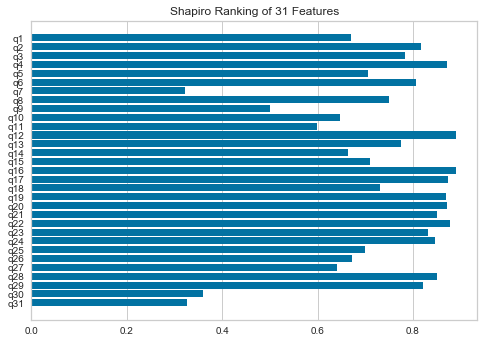

Time to select features: 0.26635217666625977


In [37]:
time_init = time.time()
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

time_end = time.time()
print("Time to select features:", (time_end-time_init))

## IX. Rank2D from yellowbrick.features

### IX.I. Algorithm "pearson"

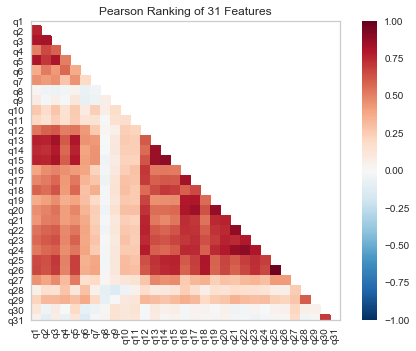

Time to select features: 0.5143520832061768


In [38]:
time_init = time.time()
# Instantiate the visualizer with the covariance ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure
time_end = time.time()
print("Time to select features:", (time_end-time_init))

### IX.II. Algorithm "covariance"

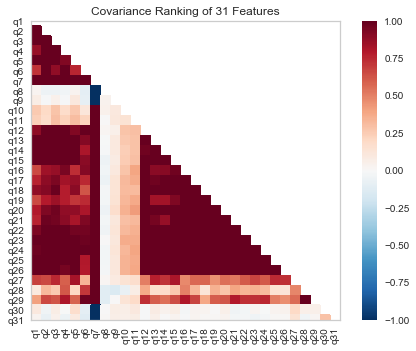

Time to select features: 0.4676964282989502


In [39]:
time_init = time.time()
# Instantiate the visualizer with the covariance ranking algorithm
visualizer = Rank2D(algorithm='covariance')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure
time_end = time.time()
print("Time to select features:", (time_end-time_init))

### IX.III. Algorithm "spearman"

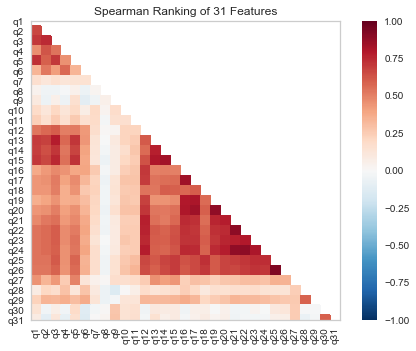

Time to select features: 0.49944043159484863


In [40]:
time_init = time.time()
# Instantiate the visualizer with the covariance ranking algorithm
visualizer = Rank2D(algorithm='spearman')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure
time_end = time.time()
print("Time to select features:", (time_end-time_init))

### IX.IV. Algorithm "kendalltau"

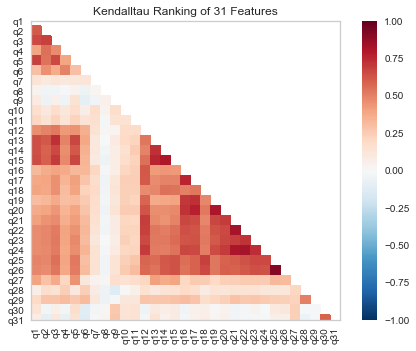

Time to select features: 0.7757449150085449


In [41]:
time_init = time.time()
# Instantiate the visualizer with the covariance ranking algorithm
visualizer = Rank2D(algorithm='kendalltau')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure
time_end = time.time()
print("Time to select features:", (time_end-time_init))

## X. FeatureCorrelation from yellowbrick.target

### X.I. Method "pearson"

GPF


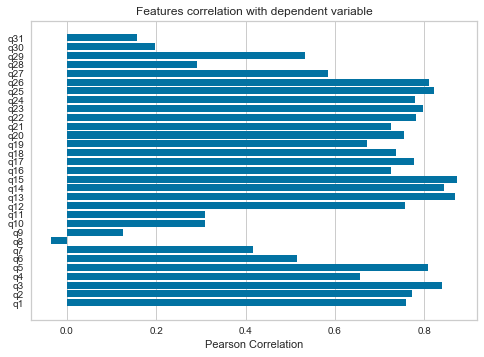

AC


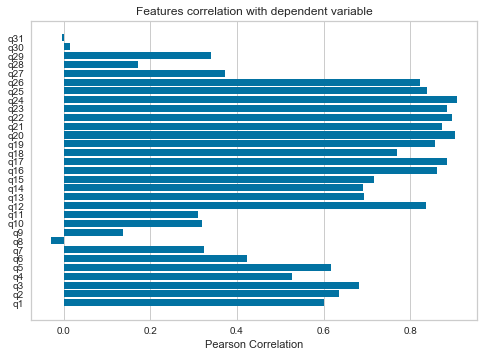

LMF


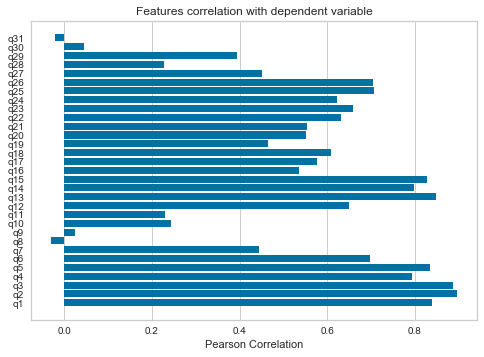

C


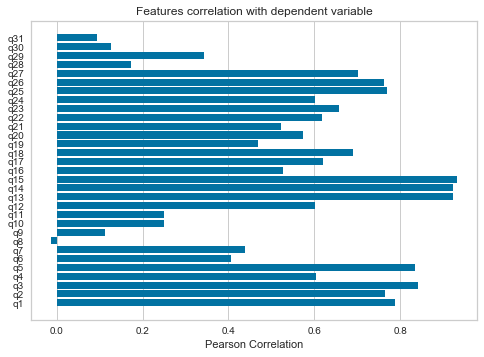

RFC


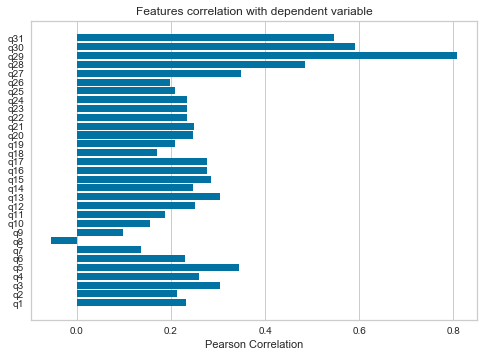

Time to select features: 0.9940187931060791


In [72]:
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    print(colname)
    visualizer = FeatureCorrelation(method="pearson")
    visualizer.fit(X, y[colname])
    visualizer.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))

### X.II. Method "mutual_info-regression"

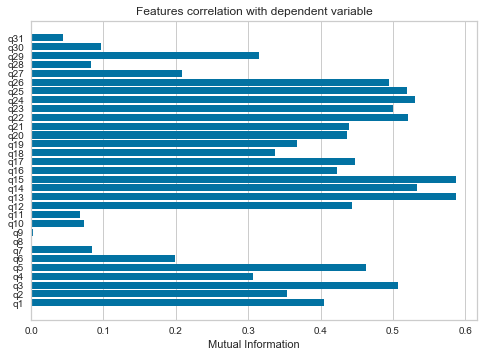

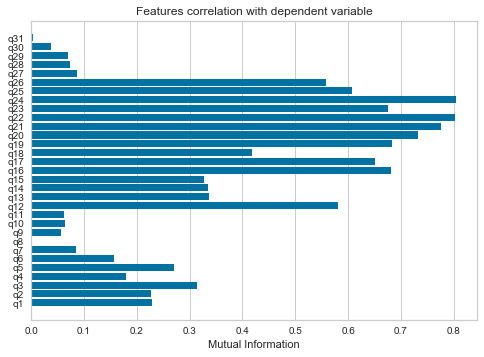

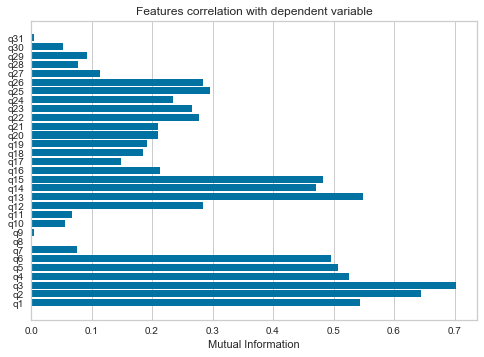

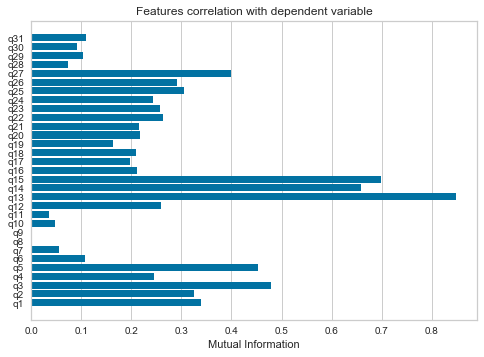

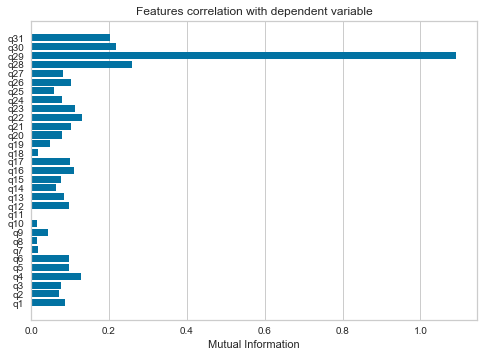

Time to select features: 3.0915377140045166


In [43]:
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    visualizer = FeatureCorrelation(method="mutual_info-regression")
    visualizer.fit(X, y[colname])
    visualizer.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# <u>EMBEDDED METHODS</u>

## I. SelectFromModel from sklearn.feature_selection

### I.I. Wrap Linear Regression

In [44]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectFromModel(estimator=LinearRegression())
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.019840002059936523
Number of features 25
Linear Regression r2 score: 0.9996610799620684
Ridge Regression r2 score: 0.9996598426576423
Lasso Regression r2 score: 0.9919351363200745
Extra Trees Regression r2 score: 0.9630684574901981
Linear SVR r2 score: 0.9995624198185922
Avg r2 score: 0.9907773872497151


(0.9907773872497151,
 [0.9996610799620684,
  0.9996598426576423,
  0.9919351363200745,
  0.9630684574901981,
  0.9995624198185922])

### I.II. Wrap Ridge Regression

In [45]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectFromModel(estimator=Ridge())
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.017359495162963867
Number of features 25
Linear Regression r2 score: 0.9996610799620684
Ridge Regression r2 score: 0.9996598426576423
Lasso Regression r2 score: 0.9919351363200745
Extra Trees Regression r2 score: 0.9580021899689184
Linear SVR r2 score: 0.9996270129677594
Avg r2 score: 0.9897770523752927


(0.9897770523752927,
 [0.9996610799620684,
  0.9996598426576423,
  0.9919351363200745,
  0.9580021899689184,
  0.9996270129677594])

### I.III. Wrap Lasso Regression

In [46]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectFromModel(estimator=Lasso())
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.01835012435913086
Number of features 26
Linear Regression r2 score: 0.9996623230826497
Ridge Regression r2 score: 0.9996609968097125
Lasso Regression r2 score: 0.9906745517123282
Extra Trees Regression r2 score: 0.9686474459670071
Linear SVR r2 score: 0.9943871833336898
Avg r2 score: 0.9906065001810775


(0.9906065001810775,
 [0.9996623230826497,
  0.9996609968097125,
  0.9906745517123282,
  0.9686474459670071,
  0.9943871833336898])

### I.IV. Wrap Extra Trees Regression

In [47]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectFromModel(estimator=ExtraTreeRegressor())
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.02972126007080078
Number of features 15
Linear Regression r2 score: 0.9883536410573404
Ridge Regression r2 score: 0.9883615406576143
Lasso Regression r2 score: 0.9804268049173418
Extra Trees Regression r2 score: 0.9535402264660104
Linear SVR r2 score: 0.9884698816853407
Avg r2 score: 0.9798304189567295


(0.9798304189567295,
 [0.9883536410573404,
  0.9883615406576143,
  0.9804268049173418,
  0.9535402264660104,
  0.9884698816853407])

### I.V. Wrap Linear SVR Regression

In [48]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = SelectFromModel(estimator=LinearSVR())
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.4726874828338623
Number of features 25
Linear Regression r2 score: 0.9996610799620684
Ridge Regression r2 score: 0.9996598426576423
Lasso Regression r2 score: 0.9919351363200745
Extra Trees Regression r2 score: 0.9585281179165005
Linear SVR r2 score: 0.9996225764877795
Avg r2 score: 0.989881350668813


(0.989881350668813,
 [0.9996610799620684,
  0.9996598426576423,
  0.9919351363200745,
  0.9585281179165005,
  0.9996225764877795])

## II. SequentialFeatureSelector from sklearn.feature_selection

k-fold(5) and n_features_to_select(0.5) for all

### II.I. Wrap Linear Regression

### II.II. Wrap Ridge Regression

### II.III. Wrap Lasso Regression

### II.IV. Wrap Extra Trees Regression

### II.V. Wrap Linear SVR Regression

## III. RFE from sklearn.feature_selection

step(1) and n_features_to_select(5) for all

In [49]:
step=1
n_features=5

### III.I. Wrap Linear Regression

In [50]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = RFE(estimator=LinearRegression(), n_features_to_select=n_features, step=step)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.18401432037353516
Number of features 19
Linear Regression r2 score: 0.9958681319582589
Ridge Regression r2 score: 0.9958772818730829
Lasso Regression r2 score: 0.9880117044418949
Extra Trees Regression r2 score: 0.9614925525018039
Linear SVR r2 score: 0.9959286836247007
Avg r2 score: 0.9874356708799483


(0.9874356708799483,
 [0.9958681319582589,
  0.9958772818730829,
  0.9880117044418949,
  0.9614925525018039,
  0.9959286836247007])

### III.II. Wrap Ridge Regression

In [51]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = RFE(estimator=Ridge(), n_features_to_select=n_features, step=step)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.1686394214630127
Number of features 19
Linear Regression r2 score: 0.9958715097481388
Ridge Regression r2 score: 0.9958761697486725
Lasso Regression r2 score: 0.9885443969248273
Extra Trees Regression r2 score: 0.962929452296936
Linear SVR r2 score: 0.9957681353431665
Avg r2 score: 0.9877979328123484


(0.9877979328123484,
 [0.9958715097481388,
  0.9958761697486725,
  0.9885443969248273,
  0.962929452296936,
  0.9957681353431665])

### III.III. Wrap Lasso Regression

In [52]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = RFE(estimator=Lasso(), n_features_to_select=n_features, step=step)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.2529597282409668
Number of features 19
Linear Regression r2 score: 0.9936468295736669
Ridge Regression r2 score: 0.9936468935544444
Lasso Regression r2 score: 0.985405505658607
Extra Trees Regression r2 score: 0.9505804435556202
Linear SVR r2 score: 0.9919445913512037
Avg r2 score: 0.9830448527387083


(0.9830448527387083,
 [0.9936468295736669,
  0.9936468935544444,
  0.985405505658607,
  0.9505804435556202,
  0.9919445913512037])

### III.IV. Wrap Extra Trees Regression

In [53]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = RFE(estimator=ExtraTreeRegressor(), n_features_to_select=n_features, step=step)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 0.342240571975708
Number of features 20
Linear Regression r2 score: 0.9953691452951873
Ridge Regression r2 score: 0.9953714347745674
Lasso Regression r2 score: 0.9883878156933438
Extra Trees Regression r2 score: 0.9554065380338056
Linear SVR r2 score: 0.995159272070923
Avg r2 score: 0.9859388411735655


(0.9859388411735655,
 [0.9953691452951873,
  0.9953714347745674,
  0.9883878156933438,
  0.9554065380338056,
  0.995159272070923])

### III.V. Wrap Linear SVR Regression

In [54]:
Xs_with_0s = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    transformer = RFE(estimator=LinearSVR(), n_features_to_select=n_features, step=step)
    X_new = transformer.fit_transform(X, y[colname])
    Xs_with_0s.append(transformer.inverse_transform(X_new))
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X(X, Xs_with_0s)
evaluate_subset(X_result,y)

Time to select features: 6.788760185241699
Number of features 18
Linear Regression r2 score: 0.9933590910111695
Ridge Regression r2 score: 0.9933596287099935
Lasso Regression r2 score: 0.9860307747117514
Extra Trees Regression r2 score: 0.953987525241574
Linear SVR r2 score: 0.9932812501461985
Avg r2 score: 0.9840036539641375


(0.9840036539641375,
 [0.9933590910111695,
  0.9933596287099935,
  0.9860307747117514,
  0.953987525241574,
  0.9932812501461985])

## IV. RFECV from sklearn.feature_selection

step(1), k-fold(5), and min_features_to_select(1) for all

In [55]:
step=1
k_fold=5
n_features=1

### IV.I. Wrap Linear Regression

In [56]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = RFECV(estimator=LinearRegression(), step=1, cv=5)
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

ERROR: 'LinearRegression' object has no attribute 'fit_transform'


### IV.II. Wrap Ridge Regression

In [57]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = RFECV(estimator=Ridge(), step=1, cv=5)
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

ERROR: 'Ridge' object has no attribute 'fit_transform'


### IV.III. Wrap Lasso Regression

In [58]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = RFECV(estimator=Lasso(), step=1, cv=5)
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

ERROR: 'Lasso' object has no attribute 'fit_transform'


### IV.IV. Wrap Extra Trees Regression

In [59]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = RFECV(estimator=ExtraTreeRegressor(), step=1, cv=5)
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

ERROR: 'ExtraTreeRegressor' object has no attribute 'fit_transform'


### IV.V. Wrap Linear SVR Regression

In [60]:
try:
    Xs_with_0s = []
    time_init = time.time()
    for index in range(0,y.shape[1]):
        colname =  y.columns[index]
        transformer = RFECV(estimator=LinearSVR(), step=1, cv=5)
        X_new = transformer.fit_transform(X, y[colname])
        Xs_with_0s.append(transformer.inverse_transform(X_new))
    time_end = time.time()
    print("Time to select features:", (time_end-time_init))
    X_result = get_resulting_X(X, Xs_with_0s)
    evaluate_subset(X_result,y)
except Exception as e:
    print(colored('ERROR: '+str(e), 'red'))

ERROR: 'LinearSVR' object has no attribute 'fit_transform'


## V. Feature Importances from yellowbrick.model_selection

topn=15, stack=false,relative=true

### V.I. Wrap Linear Regression

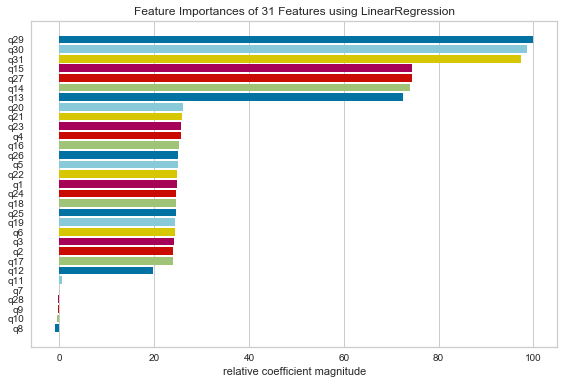

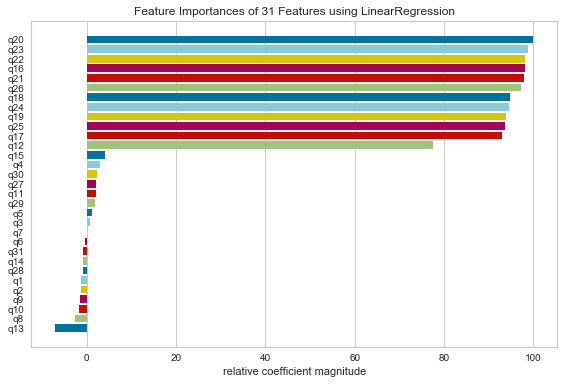

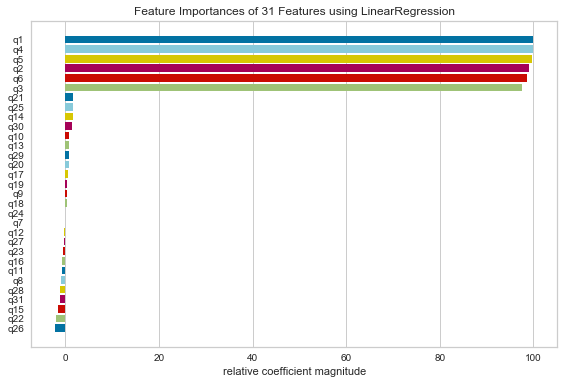

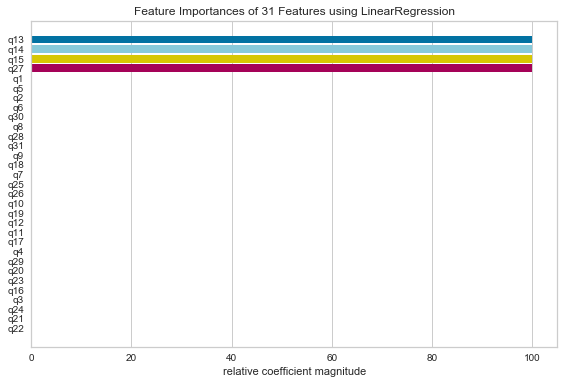

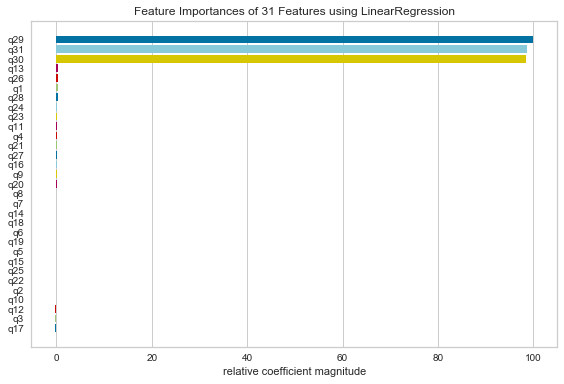

Time to select features: 1.8704547882080078


In [61]:
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    viz = FeatureImportances(LinearRegression())
    viz.fit(X, y[colname])
    viz.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))

### V.II. Wrap Ridge Regression

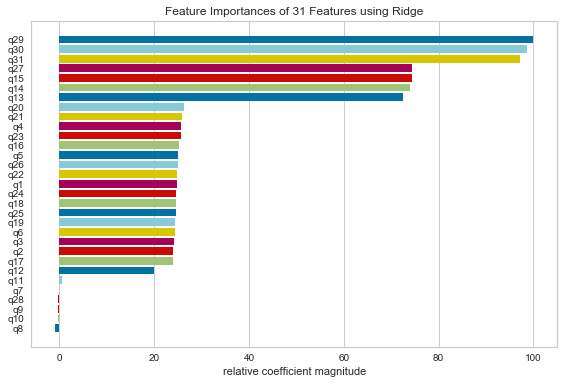

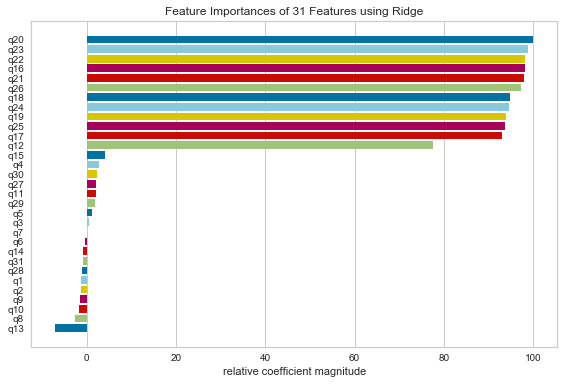

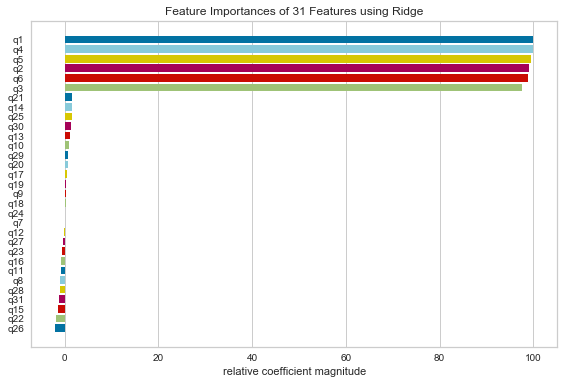

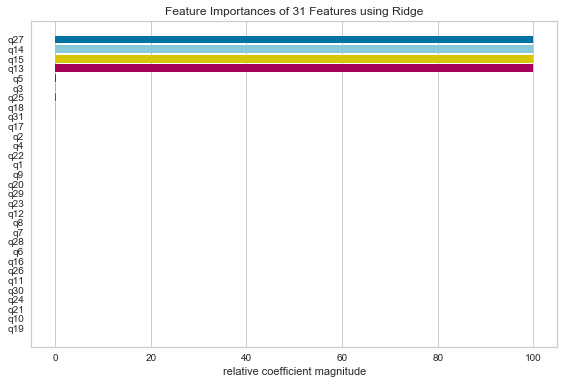

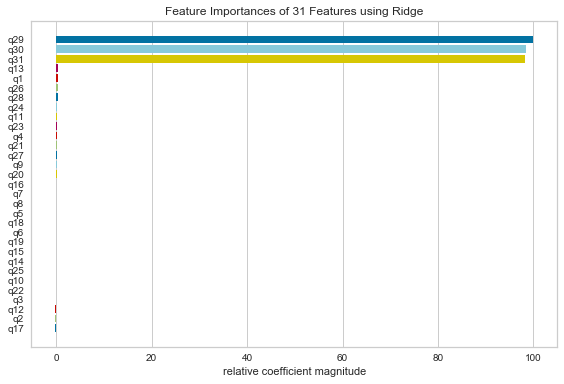

Time to select features: 1.7211191654205322


In [62]:
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    viz = FeatureImportances(Ridge())
    viz.fit(X, y[colname])
    viz.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))

### V.III. Wrap Lasso Regression

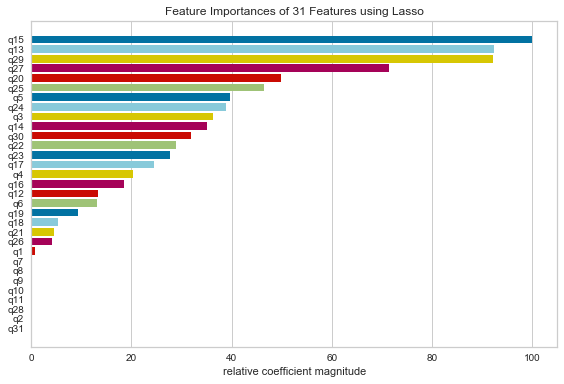

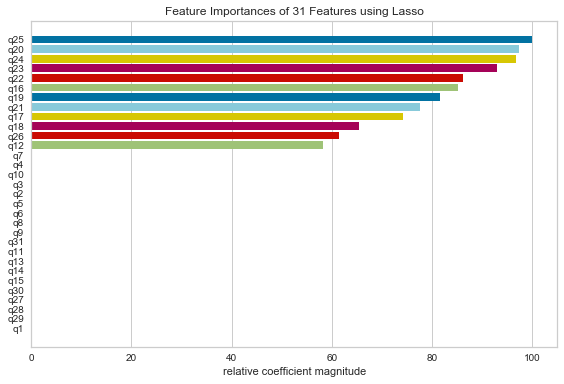

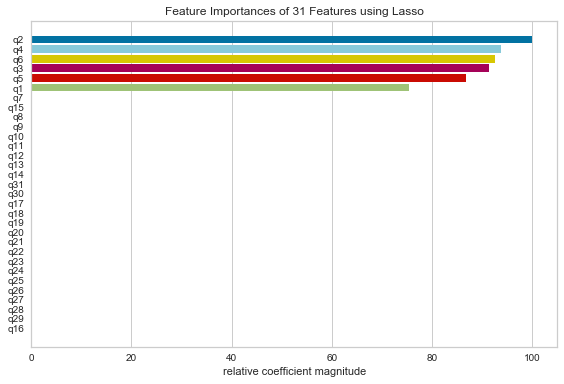

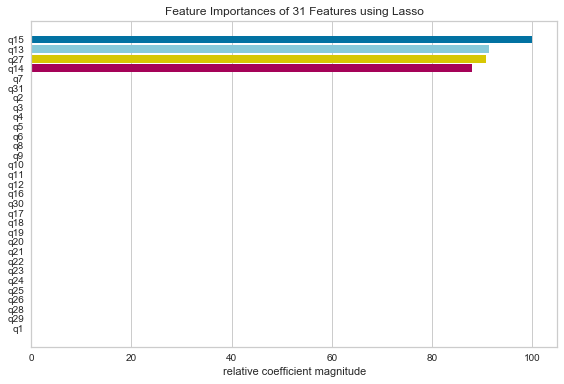

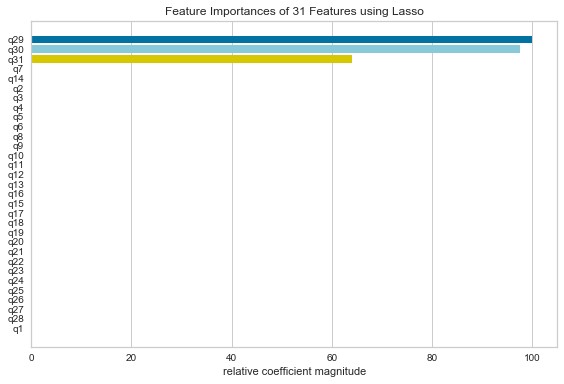

Time to select features: 1.8748815059661865


In [63]:
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    viz = FeatureImportances(Lasso())
    viz.fit(X, y[colname])
    viz.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))

### V.IV. Wrap Extra Trees Regression

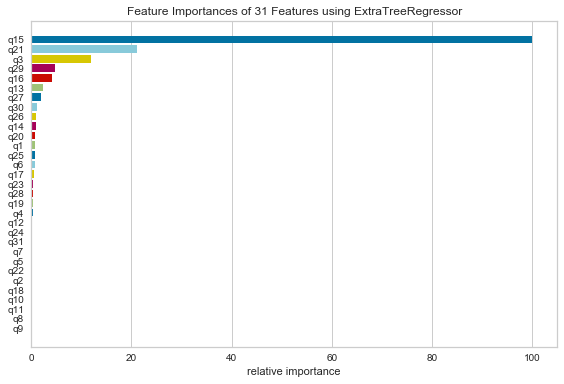

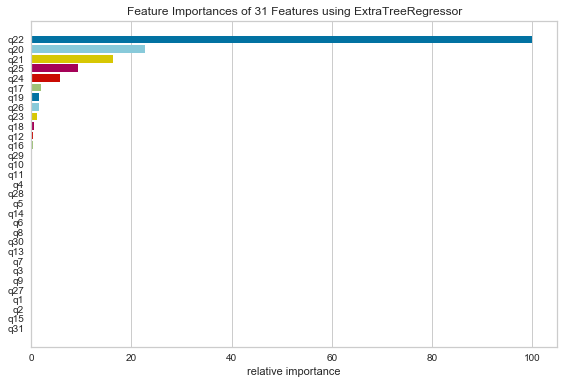

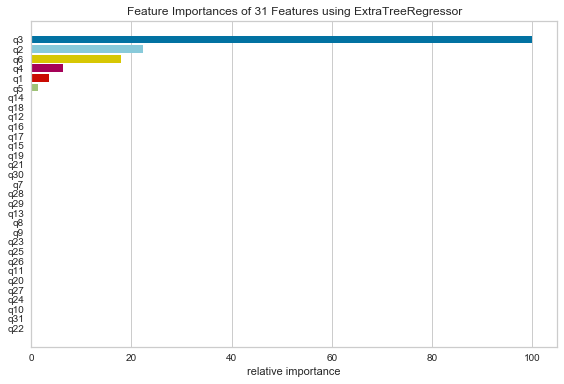

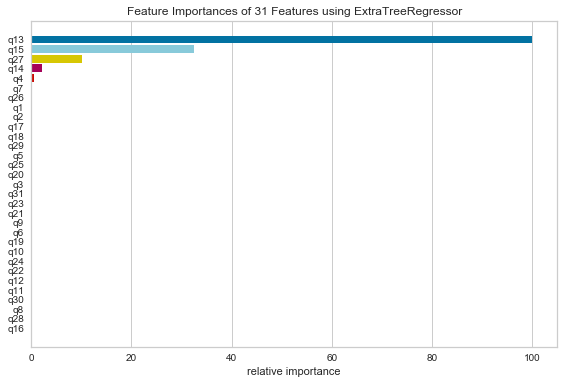

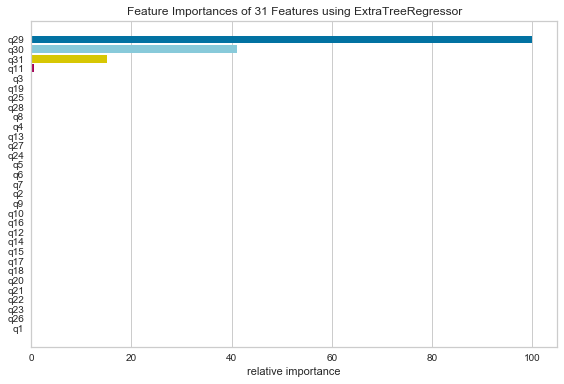

Time to select features: 1.9066636562347412


In [64]:
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    viz = FeatureImportances(ExtraTreeRegressor())
    viz.fit(X, y[colname])
    viz.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))

### V.V. Wrap Linear SVR Regression

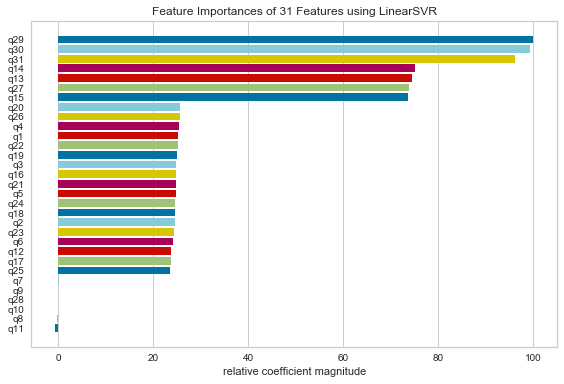

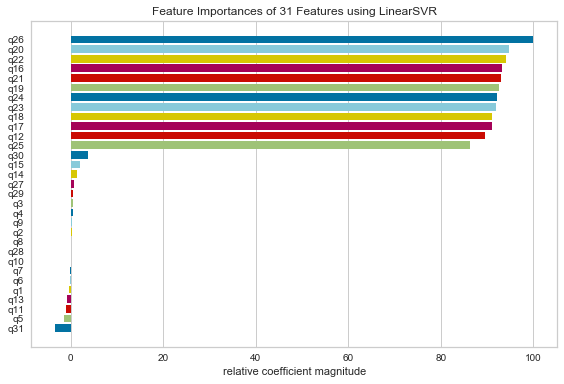

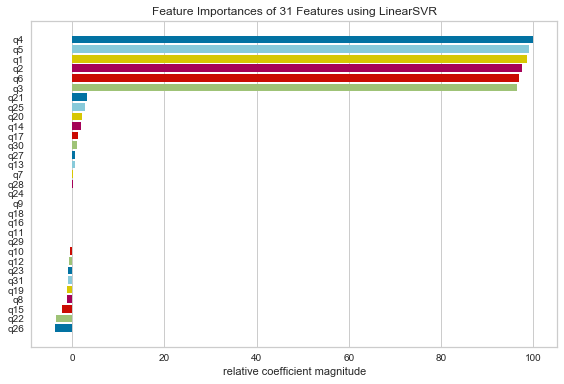

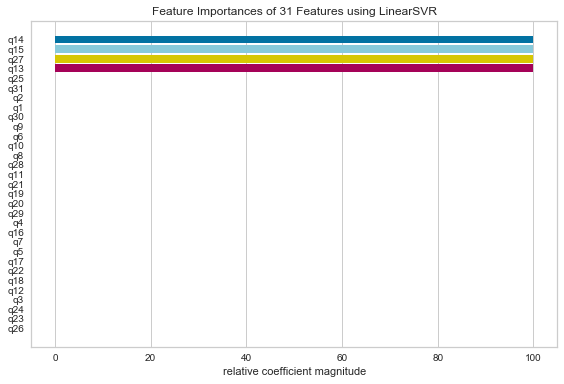

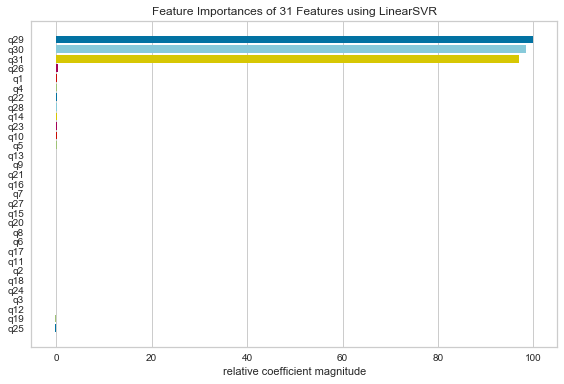

Time to select features: 2.0078094005584717


In [65]:
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    viz = FeatureImportances(LinearSVR())
    viz.fit(X, y[colname])
    viz.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))

## VI. RFECV from yellowbrick.model_selection

step=1, cv=5

### VI.I. Wrap Linear Regression

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 




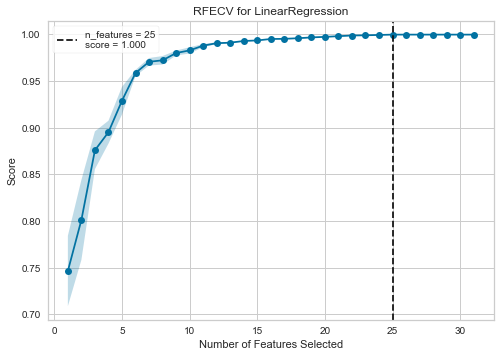

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 




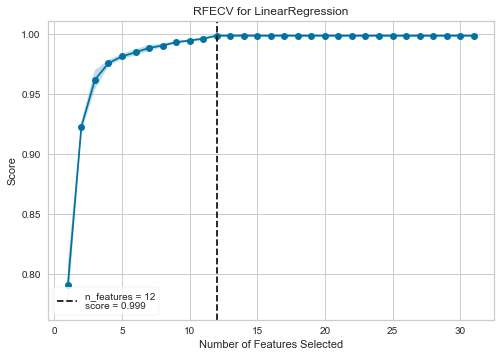

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 




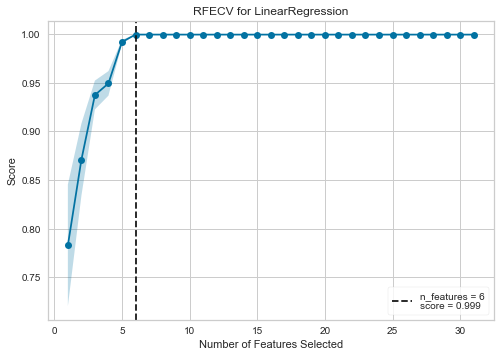

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 




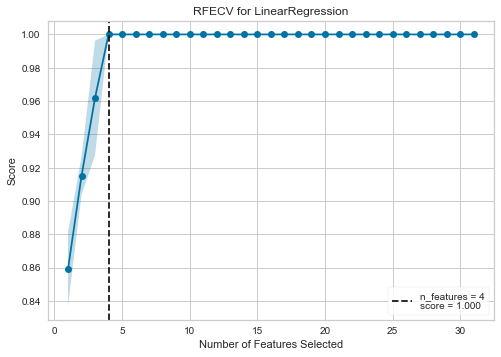

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'copy_X', 'fit_intercept', 'n_jobs', 'normalize']) 




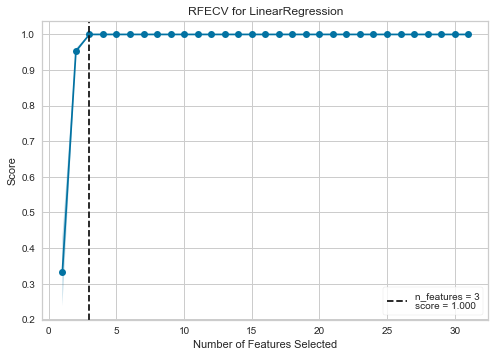

Time to select features: 13.765469551086426
Number of features 25
Linear Regression r2 score: 0.9996610799620684
Ridge Regression r2 score: 0.9996598426576423
Lasso Regression r2 score: 0.9919351363200745
Extra Trees Regression r2 score: 0.9618771047734992
Linear SVR r2 score: 0.9996292332416747
Avg r2 score: 0.9905524793909919


(0.9905524793909919,
 [0.9996610799620684,
  0.9996598426576423,
  0.9919351363200745,
  0.9618771047734992,
  0.9996292332416747])

In [66]:
rankings = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    viz = RFECV(LinearRegression())
    viz.fit(X, y[colname])
    rankings.append(viz.ranking_)
    viz.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X_yellowbrick(X, rankings)
evaluate_subset(X_result,y)

### VI.II. Wrap Ridge Regression

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 




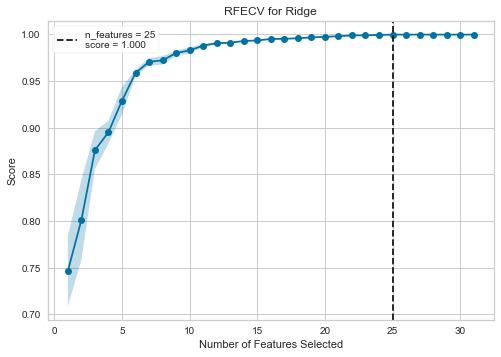

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 




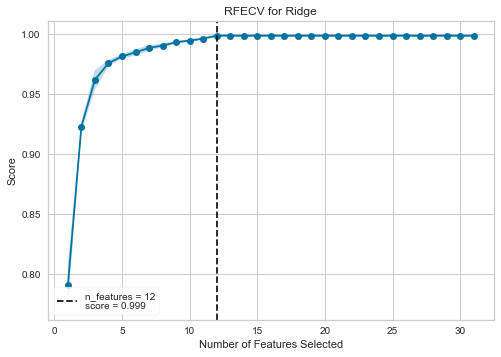

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 




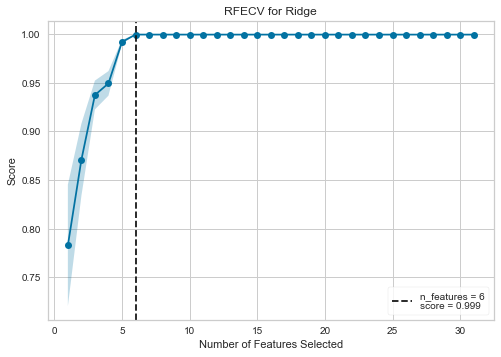

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 




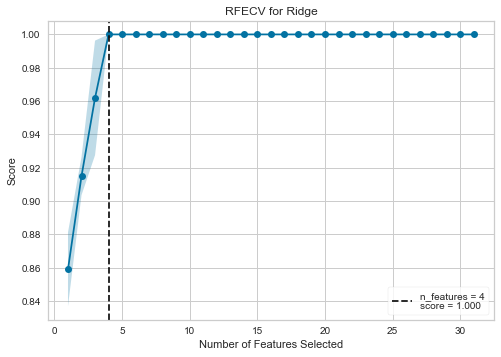

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol']) 




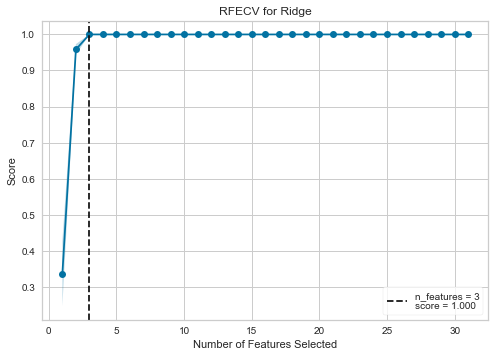

Time to select features: 14.980705976486206
Number of features 25
Linear Regression r2 score: 0.9996610799620684
Ridge Regression r2 score: 0.9996598426576423
Lasso Regression r2 score: 0.9919351363200745
Extra Trees Regression r2 score: 0.9564053828636553
Linear SVR r2 score: 0.9996077940561741
Avg r2 score: 0.989453847171923


(0.989453847171923,
 [0.9996610799620684,
  0.9996598426576423,
  0.9919351363200745,
  0.9564053828636553,
  0.9996077940561741])

In [67]:
rankings = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    viz = RFECV(Ridge())
    viz.fit(X, y[colname])
    rankings.append(viz.ranking_)
    viz.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X_yellowbrick(X, rankings)
evaluate_subset(X_result,y)

### VI.III. Wrap Lasso Regression

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 




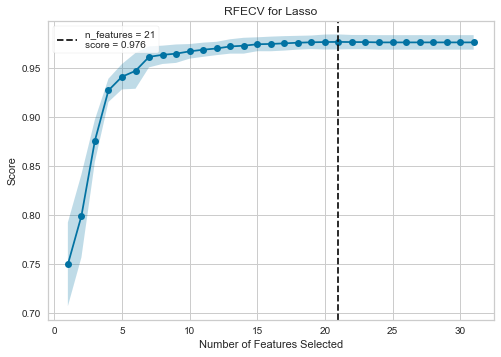

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 




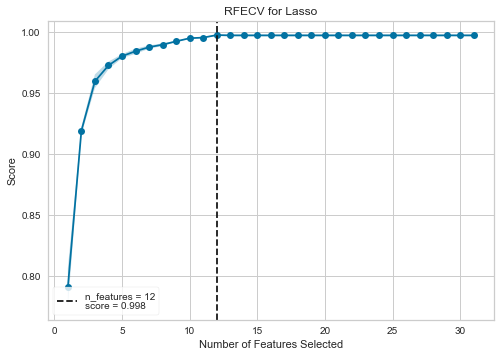

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 




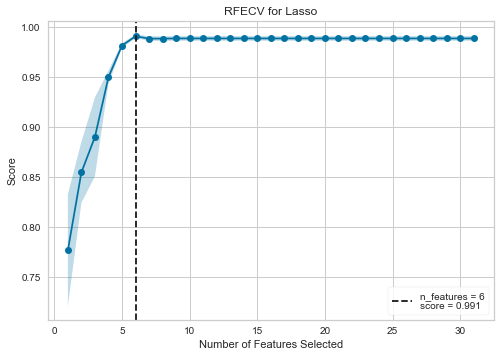

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 




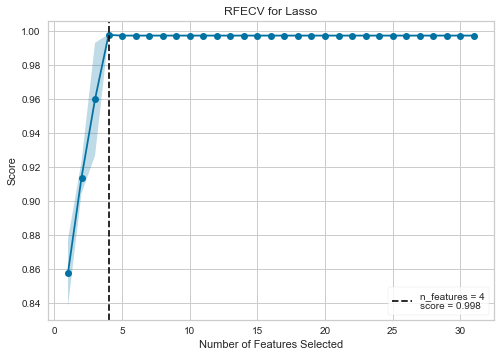

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start']) 




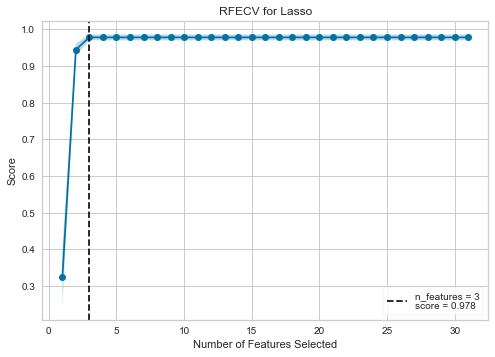

Time to select features: 17.97902798652649
Number of features 25
Linear Regression r2 score: 0.9996610799620684
Ridge Regression r2 score: 0.9996598426576423
Lasso Regression r2 score: 0.9919351363200745
Extra Trees Regression r2 score: 0.9547208337289831
Linear SVR r2 score: 0.9996007704568427
Avg r2 score: 0.9891155326251223


(0.9891155326251223,
 [0.9996610799620684,
  0.9996598426576423,
  0.9919351363200745,
  0.9547208337289831,
  0.9996007704568427])

In [68]:
rankings = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    viz = RFECV(Lasso())
    viz.fit(X, y[colname])
    rankings.append(viz.ranking_)
    viz.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X_yellowbrick(X, rankings)
evaluate_subset(X_result,y)

### VI.IV. Wrap Extra Tree Regression

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 




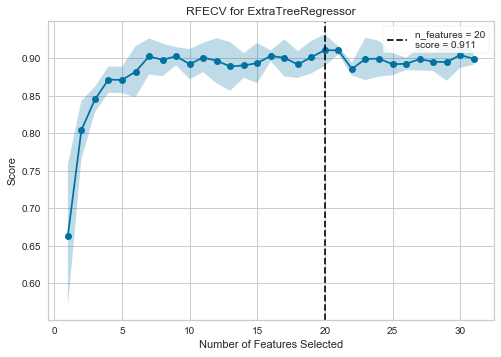

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 




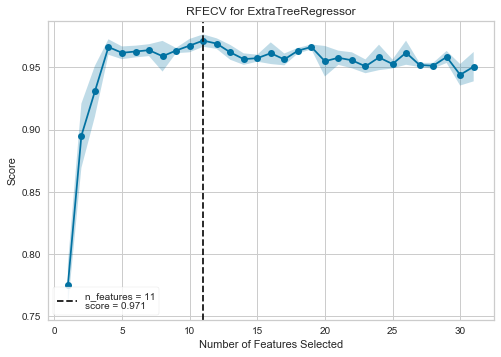

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 




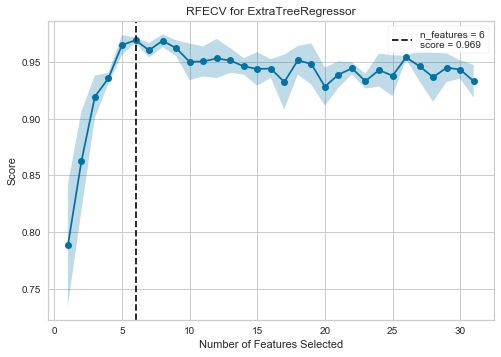

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 




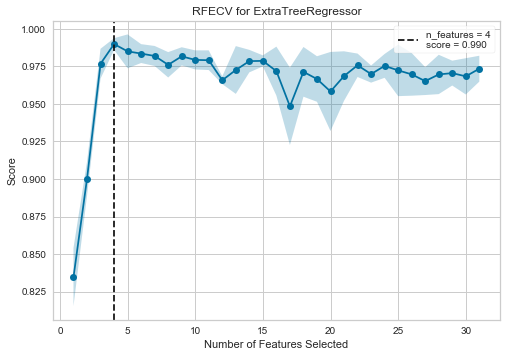

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']) 




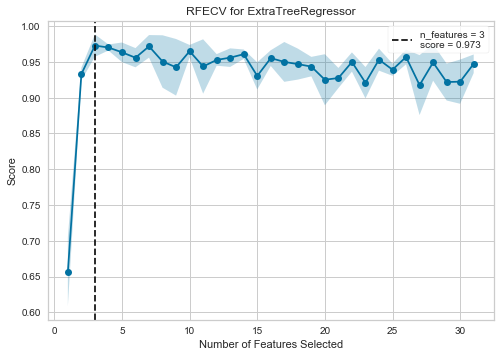

Time to select features: 18.757747650146484
Number of features 24
Linear Regression r2 score: 0.999241238378937
Ridge Regression r2 score: 0.999240281936739
Lasso Regression r2 score: 0.9914768853924656
Extra Trees Regression r2 score: 0.9574881275073682
Linear SVR r2 score: 0.999209421253029
Avg r2 score: 0.9893311908937077


(0.9893311908937077,
 [0.999241238378937,
  0.999240281936739,
  0.9914768853924656,
  0.9574881275073682,
  0.999209421253029])

In [69]:
rankings = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    viz = RFECV(ExtraTreeRegressor())
    viz.fit(X, y[colname])
    rankings.append(viz.ranking_)
    viz.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X_yellowbrick(X, rankings)
evaluate_subset(X_result,y)

### VI.V. Wrap Linear SVR Regression

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 




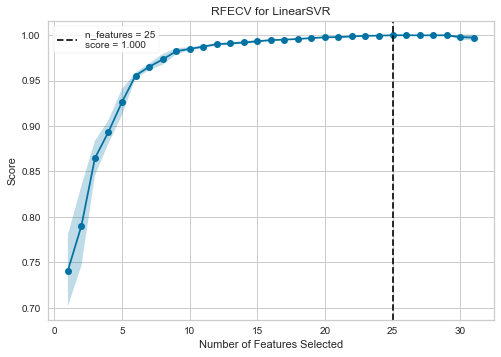

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 




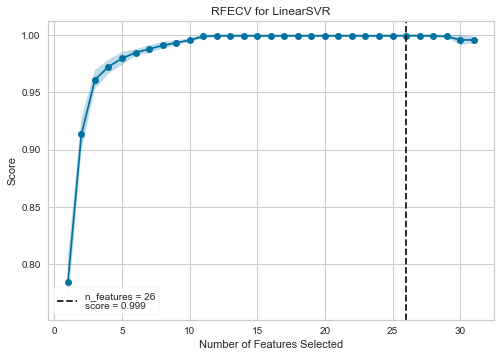

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 




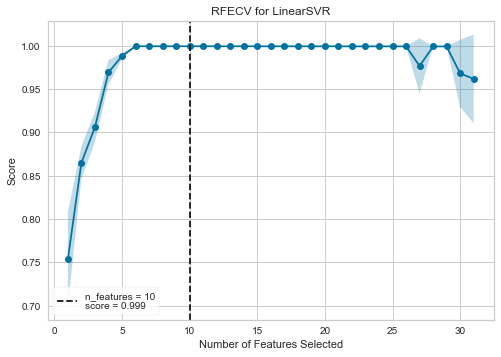

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 




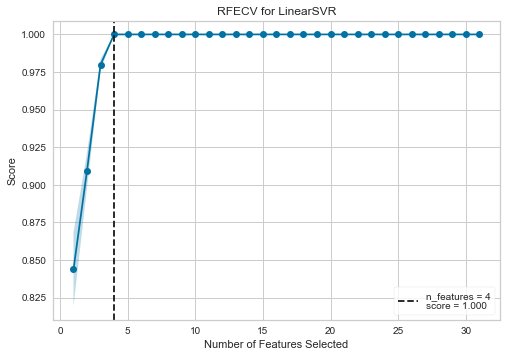

dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose']) 




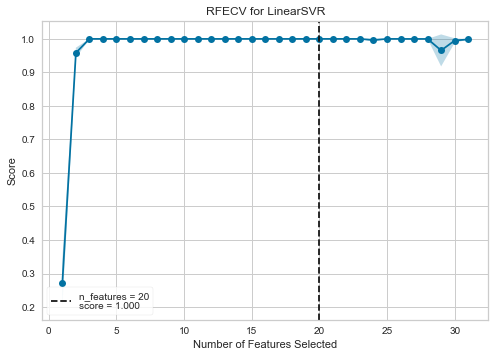

Time to select features: 351.00866961479187
Number of features 29
Linear Regression r2 score: 0.9996616338548634
Ridge Regression r2 score: 0.999660199845518
Lasso Regression r2 score: 0.9919352254601697
Extra Trees Regression r2 score: 0.9516628146231563
Linear SVR r2 score: 0.9995857870377771
Avg r2 score: 0.9885011321642969


(0.9885011321642969,
 [0.9996616338548634,
  0.999660199845518,
  0.9919352254601697,
  0.9516628146231563,
  0.9995857870377771])

In [70]:
rankings = []
time_init = time.time()
for index in range(0,y.shape[1]):
    colname =  y.columns[index]
    viz = RFECV(LinearSVR())
    viz.fit(X, y[colname])
    rankings.append(viz.ranking_)
    viz.show()
time_end = time.time()
print("Time to select features:", (time_end-time_init))
X_result = get_resulting_X_yellowbrick(X, rankings)
evaluate_subset(X_result,y)